In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

hdu = fits.open('LAII.fits')
data = hdu[0].data
model_hdu = fits.open('model_LAII.fits')
model_data = model_hdu[0].data
print("Original data:\t" + str(data.shape))
print("Model data:\t" + str(model_data.shape))

Original data:	(302, 118, 287)
Model data:	(302, 118, 287)


In [2]:
def getImgStats(img):
    v = list(np.percentile(img, [10, 25, 50, 75, 90, 99]))
    s = str(img.shape)
    s += f"\navg:\t{np.mean(img)}"
    s += f"\nstd:\t{np.std(img)}"
    s += f"\nmin:\t{np.min(img)}"
    s += f"\n10:\t{v[0]}"
    s += f"\n25:\t{v[1]}"
    s += f"\n50:\t{v[2]}"
    s += f"\n75:\t{v[3]}"
    s += f"\n90:\t{v[4]}"
    s += f"\n99:\t{v[5]}"
    s += f"\nmax:\t{np.max(img)}\n"
    print(s)

def normalize(img):
    # Return image normalized to (0,1)
    return (img - np.min(img)) / (np.max(img) - np.min(img))

### Original data longitude & latitude vs velocity

(302, 287)
avg:	16.19036865234375
std:	47.08497619628906
min:	-4.231339454650879
10:	-1.0742543339729307
25:	-0.22887011989951134
50:	2.1403433084487915
75:	14.253409624099731
90:	40.080130386352536
99:	237.35741439819418
max:	928.9951782226562



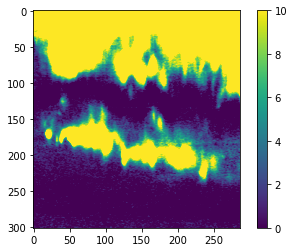

In [15]:
long_vs_v = np.sum(data, axis = (1))
#long_vs_v = normalize(long_vs_v)
#long_vs_v = np.log10(long_vs_v)
getImgStats(long_vs_v)
plt.imshow(long_vs_v, vmin=0, vmax=10)
plt.colorbar()
plt.show()

(302, 118)
avg:	39.37827682495117
std:	80.20074462890625
min:	-6.235346794128418
10:	-1.8347893953323364
25:	-0.18588725477457047
50:	5.668047666549683
75:	45.38796043395996
90:	127.41168212890625
99:	424.2293884277348
max:	894.1998291015625



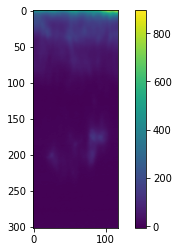

In [4]:
lat_vs_v = np.sum(data, axis = (2))
#lat_vs_v = normalize(lat_vs_v)
getImgStats(lat_vs_v)
plt.imshow(lat_vs_v)
plt.colorbar()
plt.show()

### Model data longitude & latitude vs velocity

(302, 287)
avg:	0.0944310799241066
std:	0.37350785732269287
min:	0.0
10:	1.1381517766353591e-34
25:	2.134986506717808e-19
50:	2.8828190501428708e-08
75:	0.014975411584600806
90:	0.22223808020353297
99:	1.7596341228485117
max:	10.378731727600098



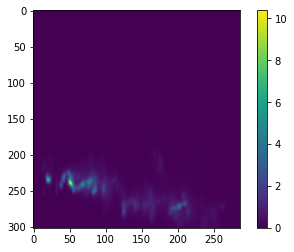

In [14]:
long_vs_v = np.sum(model_data, axis = (1))
#long_vs_v = normalize(long_vs_v)
#long_vs_v = np.log10(long_vs_v)

getImgStats(long_vs_v)
plt.imshow(long_vs_v)
plt.colorbar()
plt.show()

(302, 118)
avg:	0.22967562079429626
std:	0.8243338465690613
min:	0.0
10:	1.5009780160564994e-29
25:	1.5261263264177157e-16
50:	4.084042615204453e-07
75:	0.046311140060424805
90:	0.5332092046737671
99:	4.325614547729505
max:	10.403472900390625



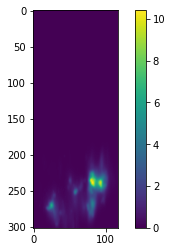

In [6]:
lat_vs_v = np.sum(model_data, axis = (2))
#lat_vs_v = normalize(lat_vs_v)
getImgStats(lat_vs_v)
plt.imshow(lat_vs_v)
plt.colorbar()
plt.show()

### Subtract model from original data

(302, 287)
avg:	16.095937728881836
std:	47.11930847167969
min:	-10.977656364440918
10:	-1.3285536885261535
25:	-0.38060519844293594
50:	2.127058982849121
75:	14.249175310134888
90:	40.07614021301268
99:	237.35741439819418
max:	928.9951782226562



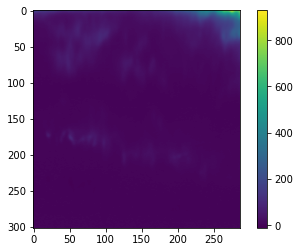

In [7]:
diff = np.sum(data, axis = (1)) - np.sum(model_data, axis = (1))
getImgStats(diff)
plt.imshow(diff)
plt.colorbar()
plt.show()

(302, 118)
avg:	39.148597717285156
std:	80.31715393066406
min:	-12.36544132232666
10:	-2.463943839073181
25:	-0.47543326765298843
50:	5.62796950340271
75:	45.381327629089355
90:	127.41168212890625
99:	424.2293884277348
max:	894.1998291015625



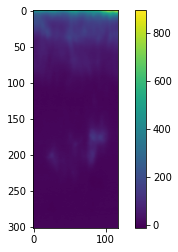

In [8]:
diff = np.sum(data, axis = (2)) - np.sum(model_data, axis = (2))
getImgStats(diff)
plt.imshow(diff)
plt.colorbar()
plt.show()

### Normalize data to (0,1) then subtract model from original data

(302, 287)
avg:	0.012784388847649097
std:	0.06449992954730988
min:	-0.9961076974868774
10:	-0.017050251550972458
25:	0.0028347436455078423
50:	0.00644397153519094
75:	0.0193850533105433
90:	0.047448323667049395
99:	0.25887471228838055
max:	1.0



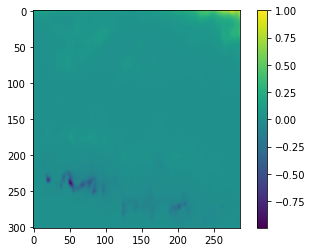

In [9]:
diff = normalize(np.sum(data, axis = (1))) - normalize(np.sum(model_data, axis = (1)))
#diff = normalize(diff)
getImgStats(diff)
plt.imshow(diff)
plt.colorbar()
plt.show()

(302, 118)
avg:	0.02858048491179943
std:	0.12701858580112457
min:	-0.9951037168502808
10:	-0.044734541326761246
25:	0.0041939400834962726
50:	0.012110230512917042
75:	0.05664108972996473
90:	0.14837965369224548
99:	0.4780629873275762
max:	1.0



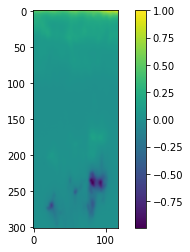

In [10]:
diff = normalize(np.sum(data, axis = (2))) - normalize(np.sum(model_data, axis = (2)))
#diff = normalize(diff)
getImgStats(diff)
plt.imshow(diff)
plt.colorbar()
plt.show()

In [ ]:
histograms and contours on these